In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.models import Sequential
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout, Activation, Dense, Flatten
from keras.layers.convolutional import Convolution1D,AveragePooling1D,MaxPooling1D
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims

Using TensorFlow backend.


In [2]:
X=pd.read_table('cube5-300K-30-2s-2V-b-Normalized.dat')['x'].values
X=[item for item in X]
for i in X:
    if i<0.3005 and i>0.2995:
        print(X.index(i))
        break

1133


In [2]:
Val=pd.read_csv('WXProjectWholeData.csv').T

In [32]:
Val

,0,1,2,3,4,5,6,7,8,9,...,531,532,533,534,535,536,537,538,539,540
300K,-3.725735e-06,4.525998e-06,2.908847e-06,2.427656e-05,-9.440132e-06,0.000001,-0.000009,1.375908e-05,-0.000006,8.251482e-06,...,0.000009,6.853926e-06,8.458366e-06,1.040596e-05,2.735244e-06,0.000011,0.000007,5.095791e-06,4.927526e-06,8.184671e-06
337.5K,-3.902080e-06,4.179847e-06,2.000026e-06,1.887536e-05,-1.016026e-05,-0.000001,-0.000010,9.020626e-06,-0.000006,6.232847e-06,...,0.000013,5.589305e-06,6.307414e-06,9.485286e-06,3.989605e-06,0.000010,0.000007,4.873359e-06,5.353326e-06,6.175191e-06
356.25K,-3.990252e-06,4.006772e-06,1.545615e-06,1.617476e-05,-1.052033e-05,-0.000003,-0.000010,6.651397e-06,-0.000007,5.223530e-06,...,0.000015,4.956994e-06,5.231938e-06,9.024950e-06,4.616786e-06,0.000010,0.000008,4.762143e-06,5.566226e-06,5.170452e-06
365.625K,-4.034339e-06,3.920234e-06,1.318409e-06,1.482446e-05,-1.070036e-05,-0.000003,-0.000010,5.466782e-06,-0.000007,4.718871e-06,...,0.000016,4.640839e-06,4.694200e-06,8.794782e-06,4.930376e-06,0.000010,0.000008,4.706536e-06,5.672676e-06,4.668082e-06
375.0K,-4.078425e-06,3.833696e-06,1.091204e-06,1.347416e-05,-1.088039e-05,-0.000004,-0.000010,4.282167e-06,-0.000007,4.214212e-06,...,0.000017,4.324684e-06,4.156462e-06,8.564614e-06,5.243966e-06,0.000010,0.000008,4.650928e-06,5.779126e-06,4.165712e-06
412.5K,-4.254770e-06,3.487546e-06,1.823819e-07,8.072955e-06,-1.160052e-05,-0.000007,-0.000011,-4.562918e-07,-0.000008,2.195577e-06,...,0.000021,3.060062e-06,2.005509e-06,7.643943e-06,6.498328e-06,0.000009,0.000008,4.428496e-06,6.204926e-06,2.156233e-06
431.25K,-4.342943e-06,3.314470e-06,-2.720290e-07,5.372355e-06,-1.196058e-05,-0.000008,-0.000011,-2.825521e-06,-0.000009,1.186260e-06,...,0.000023,2.427752e-06,9.300329e-07,7.183607e-06,7.125508e-06,0.000009,0.000008,4.317280e-06,6.417826e-06,1.151494e-06
450.0K,-4.431115e-06,3.141395e-06,-7.264400e-07,2.671756e-06,-1.232065e-05,-0.000009,-0.000011,-5.194751e-06,-0.000009,1.769425e-07,...,0.000025,1.795441e-06,-1.454433e-07,6.723271e-06,7.752689e-06,0.000008,0.000008,4.206064e-06,6.630726e-06,1.467541e-07
525.0K,-4.783806e-06,2.449094e-06,-2.544084e-06,-8.130644e-06,-1.376090e-05,-0.000015,-0.000012,-1.467167e-05,-0.000011,-3.860327e-06,...,0.000032,-7.338009e-07,-4.447348e-06,4.881928e-06,1.026141e-05,0.000007,0.000009,3.761201e-06,7.482327e-06,-3.872204e-06
562.5K,-4.960151e-06,2.102943e-06,-3.452905e-06,-1.353184e-05,-1.448103e-05,-0.000017,-0.000013,-1.941013e-05,-0.000012,-5.878962e-06,...,0.000036,-1.998422e-06,-6.598301e-06,3.961256e-06,1.151577e-05,0.000006,0.000009,3.538769e-06,7.908127e-06,-5.881683e-06


In [3]:
num=3
Tem=[300,600,800]
for k in range(3):
    for j in range(num):
        Tem.insert(j+1,(Tem[j]+Tem[j+1])/2)
for k in range(3):
    for j in range(num):
        Tem.insert(-j-1,(Tem[-j-1]+Tem[-j-2])/2)
print(Tem)
len(Tem)

[300, 337.5, 356.25, 365.625, 375.0, 412.5, 431.25, 450.0, 525.0, 562.5, 600, 625.0, 650.0, 700.0, 712.5, 725.0, 750.0, 756.25, 762.5, 775.0, 800]


21

In [158]:
X_train, X_test, y_train, y_test = train_test_split(Val.values, Tem, test_size=0.15, random_state=13)

In [159]:
X_train = np.array(X_train).astype('float32')
X_train = X_train.reshape(X_train.shape + (1,))
X_test = np.array(X_test).astype('float32')
X_test = X_test.reshape(X_test.shape + (1,))
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [153]:
y_train.shape

(17, 801)

In [4]:
model = Sequential()
activation = 'relu'
model.add(Convolution1D(5, 15, input_shape=(541,1), activation=activation))
model.add(BatchNormalization())
model.add(Convolution1D(2, 8, activation=activation))
model.add(MaxPooling1D())
model.add(BatchNormalization())
model.add(Convolution1D(2, 5, activation=activation))
model.add(MaxPooling1D())
model.add(BatchNormalization())
model.add(Convolution1D(1, 4, activation=activation))
model.add(MaxPooling1D())
model.add(BatchNormalization())
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 527, 5)            80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 527, 5)            20        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 520, 2)            82        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 260, 2)            0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 260, 2)            8         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 256, 2)            22        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 128, 2)           

In [5]:
X_train = Val.values.reshape(Val.values.shape + (1,))
feature=model.predict(X_train)

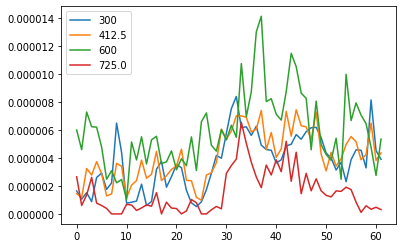

In [6]:
for i in range(0,20,5):
    plt.plot(feature[i].flatten(),label=Tem[i])
    plt.legend()
#plt.savefig('twolayers.png',bbox_inches='tight',dpi=900)

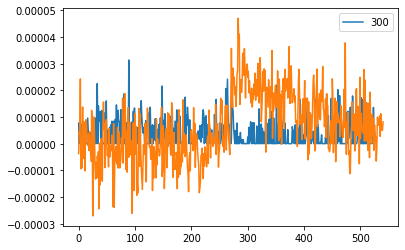

In [49]:
plt.plot(feature[0].flatten(),label=Tem[0])
plt.plot(Val.iloc[0:1].values[0])
plt.legend()

In [44]:
Val.iloc[0:1].values[0]

array([-3.72573464e-06,  4.52599782e-06,  2.90884735e-06,  2.42765554e-05,
       -9.44013207e-06,  1.30702084e-06, -9.11389058e-06,  1.37590850e-05,
       -5.55026504e-06,  8.25148179e-06,  7.81695822e-06, -1.02335731e-05,
        6.34394482e-06,  8.97684612e-06,  7.07054894e-06,  6.73829857e-07,
       -6.63076375e-07,  3.48335133e-06, -2.52079431e-06,  4.56123123e-06,
        8.26692271e-07, -2.82943606e-06, -6.62984245e-06,  1.24550927e-05,
        8.10767560e-06, -2.71001429e-05, -1.04657681e-05,  9.99600433e-06,
        4.79715386e-06, -7.36747732e-06, -1.32737218e-05, -6.96547320e-06,
       -1.28789721e-05, -4.76902490e-06, -6.41406419e-06, -3.03704478e-06,
       -2.44533016e-05,  7.99758910e-08, -1.55477982e-05, -1.34740945e-06,
        1.90034979e-06, -1.15111993e-05, -1.40733464e-05,  6.30891477e-06,
        1.55990873e-05,  5.26012182e-06,  7.31212663e-06, -9.01958337e-06,
        4.67373214e-06,  8.98235060e-06,  1.02655965e-06, -4.48085073e-06,
       -2.39401910e-06, -

In [119]:
Val.iloc[0:1].values[0]

array([-3.72573464e-06,  4.52599782e-06,  2.90884735e-06,  2.42765554e-05,
       -9.44013207e-06,  1.30702084e-06, -9.11389058e-06,  1.37590850e-05,
       -5.55026504e-06,  8.25148179e-06,  7.81695822e-06, -1.02335731e-05,
        6.34394482e-06,  8.97684612e-06,  7.07054894e-06,  6.73829857e-07,
       -6.63076375e-07,  3.48335133e-06, -2.52079431e-06,  4.56123123e-06,
        8.26692271e-07, -2.82943606e-06, -6.62984245e-06,  1.24550927e-05,
        8.10767560e-06, -2.71001429e-05, -1.04657681e-05,  9.99600433e-06,
        4.79715386e-06, -7.36747732e-06, -1.32737218e-05, -6.96547320e-06,
       -1.28789721e-05, -4.76902490e-06, -6.41406419e-06, -3.03704478e-06,
       -2.44533016e-05,  7.99758910e-08, -1.55477982e-05, -1.34740945e-06,
        1.90034979e-06, -1.15111993e-05, -1.40733464e-05,  6.30891477e-06,
        1.55990873e-05,  5.26012182e-06,  7.31212663e-06, -9.01958337e-06,
        4.67373214e-06,  8.98235060e-06,  1.02655965e-06, -4.48085073e-06,
       -2.39401910e-06, -

array([[-3.72573464e-06],
       [-3.90207983e-06],
       [-3.99025243e-06],
       [-4.03433873e-06],
       [-4.07842503e-06],
       [-4.25477022e-06],
       [-4.34294282e-06],
       [-4.43111541e-06],
       [-4.78380580e-06],
       [-4.96015100e-06],
       [-5.13649619e-06],
       [-4.45380945e-06],
       [-3.77112270e-06],
       [-2.40574922e-06],
       [-2.06440585e-06],
       [-1.72306248e-06],
       [-1.04037573e-06],
       [-8.69704048e-07],
       [-6.99032362e-07],
       [-3.57688991e-07],
       [ 3.24997752e-07]])

In [154]:
y_train = [item for i in range(50) for item in y_train]

In [157]:
np.array(y_train).shape

(850, 801)